In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('HousingPrices-Amsterdam-August-2021.csv',index_col=0)

In [3]:
df.head()

,Address,Zip,Price,Area,Room,Lon,Lat
1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 924 entries, 1 to 924
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Address  924 non-null    object 
 1   Zip      924 non-null    object 
 2   Price    920 non-null    float64
 3   Area     924 non-null    int64  
 4   Room     924 non-null    int64  
 5   Lon      924 non-null    float64
 6   Lat      924 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 57.8+ KB


In [5]:
df.isna()

,Address,Zip,Price,Area,Room,Lon,Lat
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
920,False,False,False,False,False,False,False
921,False,False,False,False,False,False,False
922,False,False,False,False,False,False,False
923,False,False,False,False,False,False,False


In [6]:
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 1 to 924
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Address  920 non-null    object 
 1   Zip      920 non-null    object 
 2   Price    920 non-null    float64
 3   Area     920 non-null    int64  
 4   Room     920 non-null    int64  
 5   Lon      920 non-null    float64
 6   Lat      920 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 57.5+ KB


In [8]:
df.head()

,Address,Zip,Price,Area,Room,Lon,Lat
1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


In [9]:
df.drop(['Address','Zip'],axis=1,inplace=True)

In [10]:
df.head()

,Price,Area,Room,Lon,Lat
1,685000.0,64,3,4.907736,52.356157
2,475000.0,60,3,4.850476,52.348586
3,850000.0,109,4,4.944774,52.343782
4,580000.0,128,6,4.789928,52.343712
5,720000.0,138,5,4.902503,52.410538


In [11]:
x=df.iloc[:,1:].values
y=df.iloc[:,0].values

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=50)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
l=LinearRegression()
l.fit(x_train,y_train)

LinearRegression()

In [16]:
p=l.predict(x_test)

In [17]:
import seaborn as sns

D:\program\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

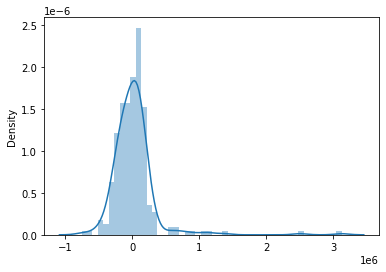

In [18]:
sns.distplot(y_test-p)

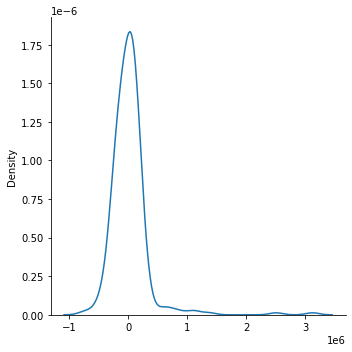

In [23]:
sns.displot(y_test-p,kind='kde')

D:\program\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

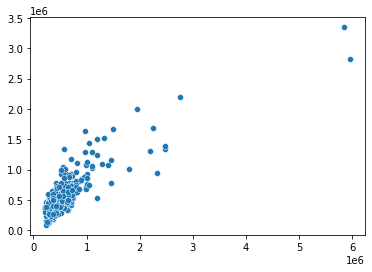

In [24]:
sns.scatterplot(y_test,p)

<AxesSubplot:>

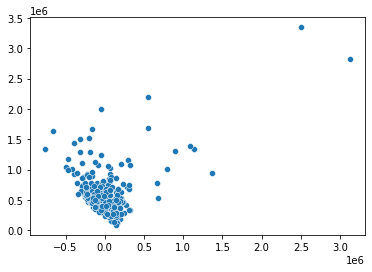

In [27]:
s=y_test-p
sns.scatterplot(s,p)

In [28]:
from sklearn import metrics
import numpy as np

In [29]:
print('MAE',metrics.mean_absolute_error(y_test,p))
print('MSE',metrics.mean_squared_error(y_test,p))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,p)))

MAE 185013.43418183233
MSE 115624329195.10286
RMSE 340035.77634581755


In [30]:
from sklearn.metrics import r2_score

In [31]:
s=r2_score(y_test,p)

In [32]:
print(round(s,2)*100)

67.0


In [33]:
import pickle
pickle.dump(l,open('model.pkl','wb'))